<a href="https://colab.research.google.com/github/triptojoon/Quant/blob/master/timeseries_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from vega_datasets import data
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
data.list_datasets()

['7zip',
 'airports',
 'annual-precip',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2-concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare-dependencies',
 'flights-10k',
 'flights-200k',
 'flights-20k',
 'flights-2k',
 'flights-3m',
 'flights-5k',
 'flights-airport',
 'gapminder',
 'gapminder-health-income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa-electricity',
 'iris',
 'jobs',
 'la-riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal-2d',
 'obesity',
 'ohlc',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment-across-industries',
 'uniform-2d',
 'us-10m',
 'us-employment',
 'us-state-capitals',
 'volcano',
 'weather',
 'weball26',
 'wheat',

In [ ]:
df = data.cars(use_local = True)

In [ ]:
df.head(10)

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,1970-01-01,USA
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,1970-01-01,USA
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,1970-01-01,USA
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,1970-01-01,USA
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,1970-01-01,USA


In [ ]:
df.Name

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
401              ford mustang gl
402                    vw pickup
403                dodge rampage
404                  ford ranger
405                   chevy s-10
Name: Name, Length: 406, dtype: object

In [ ]:
df.loc[:,'Name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
401              ford mustang gl
402                    vw pickup
403                dodge rampage
404                  ford ranger
405                   chevy s-10
Name: Name, Length: 406, dtype: object

In [ ]:
df.describe()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [ ]:
df.Miles_per_Gallon.mean()

23.514572864321615

In [ ]:
df.Miles_per_Gallon.std()

7.815984312565782

In [ ]:
df.Miles_per_Gallon.quantile(q=0.25)

17.5

In [ ]:
group1 = df[df.Miles_per_Gallon >= 20]
group2 = df[df.Miles_per_Gallon < 20]

In [ ]:
group1.describe()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
count,247.000000,247.000000,247.000000,241.000000,247.000000,247.000000
mean,28.291903,4.384615,127.512146,82.398340,2443.635628,16.440891
std,5.870930,0.893658,48.203813,17.127191,452.657515,2.375670
min,20.000000,3.000000,68.000000,46.000000,1613.000000,11.300000
25%,23.900000,4.000000,97.000000,70.000000,2109.000000,14.700000
50%,27.200000,4.000000,113.000000,83.000000,2372.000000,16.000000
75%,32.050000,4.000000,140.000000,92.000000,2722.500000,17.700000
max,46.600000,8.000000,350.000000,139.000000,3900.000000,24.800000


In [ ]:
group2.describe()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,15.700000,7.205298,301.245033,139.695364,3832.125828,14.140397
std,2.469872,1.173700,78.152156,36.889202,597.962354,2.750519
min,9.000000,3.000000,70.000000,72.000000,2124.000000,8.000000
25%,14.000000,6.000000,250.000000,106.500000,3417.500000,12.050000
50%,16.000000,8.000000,305.000000,145.000000,3840.000000,13.700000
75%,18.000000,8.000000,350.000000,160.000000,4294.500000,15.650000
max,19.900000,8.000000,455.000000,230.000000,5140.000000,21.900000


In [ ]:
df.corr()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
Miles_per_Gallon,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289
Cylinders,-0.775396,1.000000,0.951787,0.844158,0.895220,-0.522452
Displacement,-0.804203,0.951787,1.000000,0.898326,0.932475,-0.557984
Horsepower,-0.778427,0.844158,0.898326,1.000000,0.866586,-0.697124
Weight_in_lbs,-0.831741,0.895220,0.932475,0.866586,1.000000,-0.430086
Acceleration,0.420289,-0.522452,-0.557984,-0.697124,-0.430086,1.000000


In [ ]:
group1.corr()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
Miles_per_Gallon,1.000000,-0.388041,-0.519216,-0.618429,-0.592682,0.134664
Cylinders,-0.388041,1.000000,0.869231,0.529387,0.673271,-0.070433
Displacement,-0.519216,0.869231,1.000000,0.650125,0.858708,-0.095029
Horsepower,-0.618429,0.529387,0.650125,1.000000,0.704329,-0.514586
Weight_in_lbs,-0.592682,0.673271,0.858708,0.704329,1.000000,-0.005755
Acceleration,0.134664,-0.070433,-0.095029,-0.514586,-0.005755,1.000000


In [ ]:
group2.corr()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
Miles_per_Gallon,1.000000,-0.605749,-0.657698,-0.701879,-0.720812,0.411937
Cylinders,-0.605749,1.000000,0.858299,0.722523,0.744618,-0.611991
Displacement,-0.657698,0.858299,1.000000,0.831185,0.782534,-0.680238
Horsepower,-0.701879,0.722523,0.831185,1.000000,0.709881,-0.753087
Weight_in_lbs,-0.720812,0.744618,0.782534,0.709881,1.000000,-0.349320
Acceleration,0.411937,-0.611991,-0.680238,-0.753087,-0.349320,1.000000


In [ ]:
x = np.random.normal(size = 10000)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,
          2.,   4.,   5.,   3.,   9.,   9.,  11.,  13.,  23.,  26.,  23.,
         28.,  39.,  48.,  47.,  56.,  62.,  85.,  70.,  94., 103., 131.,
        145., 151., 163., 180., 168., 250., 221., 221., 234., 254., 252.,
        279., 302., 290., 299., 326., 300., 317., 298., 259., 298., 293.,
        271., 269., 253., 275., 224., 242., 204., 195., 188., 189., 137.,
        145., 112., 103., 104.,  84.,  97.,  85.,  62.,  47.,  47.,  39.,
         44.,  37.,  18.,  20.,  25.,  13.,  15.,   7.,  12.,   7.,   8.,
          5.,   1.,   3.,   1.,   8.,   2.,   0.,   1.,   2.,   1.,   0.,
          2.]),
 array([-3.86155894, -3.78503289, -3.70850683, -3.63198078, -3.55545472,
        -3.47892867, -3.40240261, -3.32587656, -3.2493505 , -3.17282445,
        -3.09629839, -3.01977233, -2.94324628, -2.86672022, -2.79019417,
        -2.71366811, -2.63714206, -2.560616  , -2.48408995, -2.40756389,
        -2.33103784, -2.25

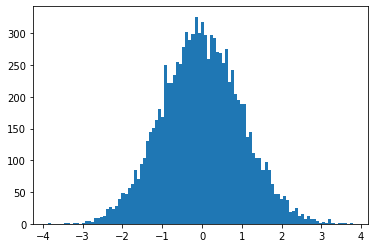

In [ ]:
plt.hist(x, bins = 100)

In [ ]:
x = np.random.normal(loc = 10, scale = 5.0, size = 10000)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          2.,   0.,   4.,   0.,   3.,   3.,   5.,   4.,   8.,   5.,   5.,
         15.,  18.,  18.,  27.,  30.,  45.,  47.,  36.,  54.,  64.,  68.,
         96., 102., 100., 131., 142., 176., 151., 171., 197., 263., 252.,
        270., 245., 307., 284., 281., 330., 340., 354., 346., 326., 335.,
        343., 345., 317., 299., 268., 262., 270., 277., 226., 210., 183.,
        168., 170., 149., 143., 111.,  88.,  74.,  68.,  61.,  54.,  36.,
         28.,  28.,  36.,  21.,  18.,  22.,  10.,  11.,  11.,   9.,   4.,
          1.,   7.,   2.,   0.,   2.,   2.,   2.,   0.,   1.,   0.,   0.,
          1.]), array([-12.29857022, -11.87870293, -11.45883563, -11.03896834,
        -10.61910105, -10.19923375,  -9.77936646,  -9.35949916,
         -8.93963187,  -8.51976458,  -8.09989728,  -7.68002999,
         -7.2601627 ,  -6.8402954 ,  -6.42042811,  -6.00056082,
         -5.58069352,  -5.16082623,  -4.74095894,  -4.32109164,

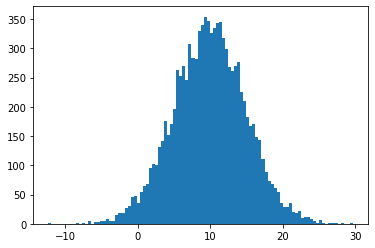

In [ ]:
plt.hist(x, bins = 100)

In [ ]:
z = (x - 10)/5

(array([  1.,   0.,   0.,   0.,   1.,   2.,   4.,   3.,   8.,  12.,  10.,
         33.,  45.,  75.,  83., 118., 164., 202., 273., 327., 368., 515.,
        515., 591., 611., 694., 672., 678., 662., 567., 532., 503., 393.,
        338., 292., 199., 142., 115.,  64.,  64.,  39.,  32.,  22.,  13.,
          8.,   2.,   4.,   2.,   1.,   1.]),
 array([-4.45971404, -4.29176713, -4.12382021, -3.95587329, -3.78792637,
        -3.61997946, -3.45203254, -3.28408562, -3.1161387 , -2.94819179,
        -2.78024487, -2.61229795, -2.44435103, -2.27640412, -2.1084572 ,
        -1.94051028, -1.77256337, -1.60461645, -1.43666953, -1.26872261,
        -1.1007757 , -0.93282878, -0.76488186, -0.59693494, -0.42898803,
        -0.26104111, -0.09309419,  0.07485273,  0.24279964,  0.41074656,
         0.57869348,  0.7466404 ,  0.91458731,  1.08253423,  1.25048115,
         1.41842807,  1.58637498,  1.7543219 ,  1.92226882,  2.09021574,
         2.25816265,  2.42610957,  2.59405649,  2.76200341,  2.92995032,
 

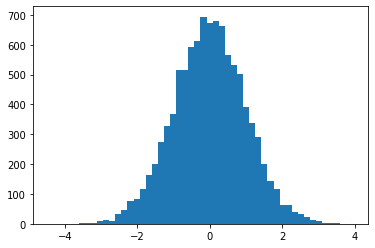

In [ ]:
plt.hist(z, bins = 50)

In [ ]:
sample_t = np.random.standard_t(df = 1000, size = 10000)

(array([  2.,   3.,   0.,   5.,   6.,  13.,  13.,  25.,  43.,  55.,  83.,
         94., 136., 182., 205., 311., 356., 370., 465., 516., 555., 592.,
        595., 616., 660., 576., 560., 504., 451., 464., 348., 294., 231.,
        195., 147.,  80.,  71.,  56.,  33.,  25.,  24.,  19.,   5.,   6.,
          6.,   0.,   0.,   2.,   0.,   2.]),
 array([-3.71503027, -3.55716865, -3.39930702, -3.24144539, -3.08358376,
        -2.92572213, -2.7678605 , -2.60999887, -2.45213724, -2.29427562,
        -2.13641399, -1.97855236, -1.82069073, -1.6628291 , -1.50496747,
        -1.34710584, -1.18924421, -1.03138258, -0.87352096, -0.71565933,
        -0.5577977 , -0.39993607, -0.24207444, -0.08421281,  0.07364882,
         0.23151045,  0.38937208,  0.5472337 ,  0.70509533,  0.86295696,
         1.02081859,  1.17868022,  1.33654185,  1.49440348,  1.65226511,
         1.81012673,  1.96798836,  2.12584999,  2.28371162,  2.44157325,
         2.59943488,  2.75729651,  2.91515814,  3.07301977,  3.23088139,
 

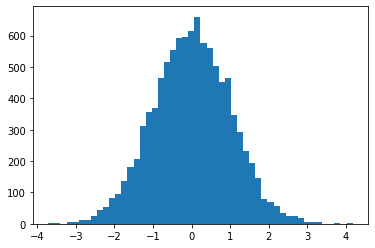

In [ ]:
plt.hist(sample_t, bins = 50)

In [ ]:
normal_x = np.random.normal(size = 10000)

In [ ]:
chi_square_one = normal_x**2

(array([4.754e+03, 1.565e+03, 9.450e+02, 6.520e+02, 4.880e+02, 3.590e+02,
        2.810e+02, 2.160e+02, 1.560e+02, 1.410e+02, 8.800e+01, 8.000e+01,
        6.900e+01, 4.800e+01, 3.700e+01, 1.900e+01, 2.100e+01, 1.700e+01,
        1.500e+01, 9.000e+00, 1.600e+01, 6.000e+00, 4.000e+00, 1.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([6.66205406e-11, 4.02523295e-01, 8.05046591e-01, 1.20756989e+00,
        1.61009318e+00, 2.01261648e+00, 2.41513977e+00, 2.81766307e+00,
        3.22018636e+00, 3.62270966e+00, 4.02523295e+00, 4.42775625e+00,
        4.83027954e+00, 5.23280284e+00, 5.63532614e+00, 6.03784943e+00,
        6.44037273e+00, 6.84289602e+00, 7.24541932e+00, 7.64794261e+00,
        8.050465

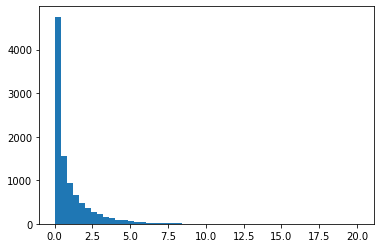

In [ ]:
plt.hist(chi_square_one, bins = 50)

In [ ]:
np.random.normal(size=10)

array([ 1.01595307, -0.22476115, -0.86329207, -1.42561555,  1.66865986,
        0.0904179 , -0.05617577,  0.9483718 ,  0.74219133, -0.39970974])

In [ ]:
random_sample = np.random.normal(loc = 5, size = 10)

In [ ]:
random_sample.mean()

4.925244031788238

In [ ]:
all_est = []
for i in range(0,100):
  random_sample = np.random.normal(loc = 5, size = 10)
  mu_est = random_sample.mean()
  all_est.append(mu_est)
  print(i,mu_est)

0 5.122182272644483
1 4.447537720423514
2 4.571564292544968
3 4.757793722778663
4 4.407750776146736
5 5.25304543567607
6 4.791077166538017
7 5.280203333262013
8 5.214844739218292
9 4.724843565162283
10 4.64449140513466
11 4.628420613577652
12 5.031265331659849
13 4.713168835228938
14 4.601852776133328
15 5.040382829032596
16 5.068533464824289
17 4.474498553124199
18 4.977932596161168
19 4.945832322115289
20 5.412836078037884
21 4.699565738659724
22 4.9849249680267445
23 5.0895581990639185
24 4.3195356625308605
25 4.752290090341223
26 5.3497486234046026
27 4.679539985394135
28 4.665655966257826
29 5.347708671658515
30 5.011773658100021
31 5.014561378220394
32 4.633046112365175
33 4.893410481007041
34 5.141236905365562
35 4.787150792959695
36 5.0168501381712485
37 4.925658642902526
38 4.771300584312256
39 4.8612724103923854
40 5.0285245731097525
41 5.13014660972425
42 4.9234436846372285
43 5.179411796816364
44 5.222757448059395
45 5.440475656762136
46 4.424561104362594
47 4.8617684947976

In [ ]:
all_est

[5.122182272644483,
 4.447537720423514,
 4.571564292544968,
 4.757793722778663,
 4.407750776146736,
 5.25304543567607,
 4.791077166538017,
 5.280203333262013,
 5.214844739218292,
 4.724843565162283,
 4.64449140513466,
 4.628420613577652,
 5.031265331659849,
 4.713168835228938,
 4.601852776133328,
 5.040382829032596,
 5.068533464824289,
 4.474498553124199,
 4.977932596161168,
 4.945832322115289,
 5.412836078037884,
 4.699565738659724,
 4.9849249680267445,
 5.0895581990639185,
 4.3195356625308605,
 4.752290090341223,
 5.3497486234046026,
 4.679539985394135,
 4.665655966257826,
 5.347708671658515,
 5.011773658100021,
 5.014561378220394,
 4.633046112365175,
 4.893410481007041,
 5.141236905365562,
 4.787150792959695,
 5.0168501381712485,
 4.925658642902526,
 4.771300584312256,
 4.8612724103923854,
 5.0285245731097525,
 5.13014660972425,
 4.9234436846372285,
 5.179411796816364,
 5.222757448059395,
 5.440475656762136,
 4.424561104362594,
 4.861768494797677,
 5.059390416209747,
 4.574981702349

In [ ]:
np.sum(all_est) / len(all_est)

4.931905391208109

In [ ]:
mu = 5

In [ ]:
all_est2 = np.array(all_est)

In [ ]:
(all_est2 - 5).std()

0.29393945614718797

In [ ]:
df

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


In [ ]:
X = df['Cylinders']
Y = df['Acceleration']

In [ ]:
X_bar = X.mean()

In [ ]:
Y_bar = Y.mean()

In [ ]:
((X-X_bar) * (Y-Y_bar)).sum()

-1015.6029556650246

In [ ]:
((X-X_bar)**2).sum()

1187.2536945812808

In [ ]:
beta_1_hat = ((X-X_bar) * (Y-Y_bar)).sum() / ((X-X_bar)**2).sum()

In [ ]:
beta_1_hat

-0.8554220216793734

In [ ]:
beta_0_hat = Y_bar - beta_1_hat * X_bar

In [ ]:
beta_0_hat

20.203456044810938

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
results = sm.ols(formula = 'Acceleration ~ Cylinders', data = df).fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Acceleration   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     151.7
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           8.18e-30
Time:                        07:01:26   Log-Likelihood:                -929.39
No. Observations:                 406   AIC:                             1863.
Df Residuals:                     404   BIC:                             1871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.2035      0.398     50.708      0.0

In [ ]:
beta_0_hat, beta_1_hat

(20.203456044810938, -0.8554220216793734)

In [ ]:
df.columns

Index(['Name', 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration', 'Year', 'Origin'],
      dtype='object')

In [ ]:
SST = ((Y - Y_bar)**2).sum()

In [ ]:
SST

3182.82236453202

In [ ]:
SSE = ((beta_0_hat + beta_1_hat * X - Y_bar)**2).sum()

In [ ]:
SSE

868.7691335585214

In [ ]:
SSR = ((Y - (beta_0_hat + beta_1_hat * X ))**2).sum()

In [ ]:
SSR

2314.053230973497

In [ ]:
R_sq = SSE/SST

In [ ]:
R_sq

0.2729555828310447

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Acceleration   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     151.7
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           8.18e-30
Time:                        07:29:39   Log-Likelihood:                -929.39
No. Observations:                 406   AIC:                             1863.
Df Residuals:                     404   BIC:                             1871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.2035      0.398     50.708      0.0

In [ ]:
df.head(10)

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,1970-01-01,USA
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,1970-01-01,USA
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,1970-01-01,USA
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,1970-01-01,USA
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,1970-01-01,USA


In [ ]:
df.loc[:,['Cylinders','Weight_in_lbs']]

,Cylinders,Weight_in_lbs
0,8,3504
1,8,3693
2,8,3436
3,8,3433
4,8,3449
...,...,...
401,4,2790
402,4,2130
403,4,2295
404,4,2625


In [ ]:
df['one'] = 1

In [ ]:
X = df.loc[:,['one','Cylinders','Weight_in_lbs']].values

In [ ]:
X

array([[   1,    8, 3504],
       [   1,    8, 3693],
       [   1,    8, 3436],
       ...,
       [   1,    4, 2295],
       [   1,    4, 2625],
       [   1,    4, 2720]])

In [ ]:
Y = df.loc[:,['Acceleration']].values

In [ ]:
Y

array([[12. ],
       [11.5],
       [11. ],
       [12. ],
       [10.5],
       [10. ],
       [ 9. ],
       [ 8.5],
       [10. ],
       [ 8.5],
       [17.5],
       [11.5],
       [11. ],
       [10.5],
       [11. ],
       [10. ],
       [ 8. ],
       [ 8. ],
       [ 9.5],
       [10. ],
       [15. ],
       [15.5],
       [15.5],
       [16. ],
       [14.5],
       [20.5],
       [17.5],
       [14.5],
       [17.5],
       [12.5],
       [15. ],
       [14. ],
       [15. ],
       [13.5],
       [18.5],
       [14.5],
       [15.5],
       [14. ],
       [19. ],
       [20. ],
       [13. ],
       [15.5],
       [15.5],
       [15.5],
       [15.5],
       [12. ],
       [11.5],
       [13.5],
       [13. ],
       [11.5],
       [12. ],
       [12. ],
       [13.5],
       [19. ],
       [15. ],
       [14.5],
       [14. ],
       [14. ],
       [19.5],
       [14.5],
       [19. ],
       [18. ],
       [19. ],
       [20.5],
       [15.5],
       [17. ],
       [23

In [ ]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

array([[ 1.98557056e+01],
       [-1.13312935e+00],
       [ 6.27069896e-04]])

In [ ]:
df[['Acceleration','Miles_per_Gallon']]

,Acceleration,Miles_per_Gallon
0,12.0,18.0
1,11.5,15.0
2,11.0,18.0
3,12.0,16.0
4,10.5,17.0
...,...,...
401,15.6,27.0
402,24.6,44.0
403,11.6,32.0
404,18.6,28.0


In [ ]:
df[(df['Cylinders'] >= 4) & (df['Weight_in_lbs'] > 3000)]

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
372,oldsmobile cutlass ls,26.6,8,350.0,105.0,3725,19.0,1982-01-01,USA
373,ford granada gl,20.2,6,200.0,88.0,3060,17.1,1982-01-01,USA
374,chrysler lebaron salon,17.6,6,225.0,85.0,3465,16.6,1982-01-01,USA
382,amc concord dl,23.0,4,151.0,NaN,3035,20.5,1982-01-01,USA


In [ ]:
df.iloc[:,:]

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


In [ ]:
df.iloc[0:10,:]

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,1970-01-01,USA
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,1970-01-01,USA
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,1970-01-01,USA
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,1970-01-01,USA
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,1970-01-01,USA


In [ ]:
df.iloc[0:10,2:4]

,Cylinders,Displacement
0,8,307.0
1,8,350.0
2,8,318.0
3,8,304.0
4,8,302.0
5,8,429.0
6,8,454.0
7,8,440.0
8,8,455.0
9,8,390.0


In [ ]:
df['one'] = 1

In [ ]:
df

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin,one
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA,1
...,...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA,1
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe,1
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA,1
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA,1


In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/khbae/econometrics/master/01_Data/test_data.txt")

In [ ]:
df2.head()

,firm,year,x,y
0,1,1,-1.113973,2.251535
1,1,2,-0.080854,1.242346
2,1,3,-0.237607,-1.426376
3,1,4,-0.152486,-1.109394
4,1,5,-0.001426,0.914686


In [ ]:
import os
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks/data')

In [ ]:
df = pd.read_csv('manning.csv')

FileNotFoundError: ignored

In [ ]:
!ls

manning.csv


In [ ]:
df2 = pd.read_csv('manning.csv')

In [ ]:
df.head()

,ds,y
0,12/10/2007,14629
1,12/11/2007,5012
2,12/12/2007,3582
3,12/13/2007,3205
4,12/14/2007,2680


In [ ]:
df2['xx'] = df2['y'] ** 2

In [ ]:
df2.head()

,ds,y,xx
0,12/10/2007,14629,214007641
1,12/11/2007,5012,25120144
2,12/12/2007,3582,12830724
3,12/13/2007,3205,10272025
4,12/14/2007,2680,7182400


In [ ]:
df2.to_csv('manning_fixed.csv')

In [ ]:
df2.describe().to_csv('summary_stats.csv')

In [ ]:
df2.corr().to_csv('correlation.csv')

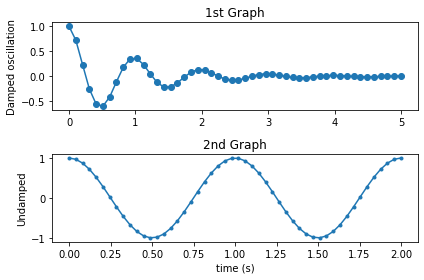

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)                # nrows=2, ncols=1, index=1
plt.plot(x1, y1, 'o-')
plt.title('1st Graph')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)                # nrows=2, ncols=1, index=2
plt.plot(x2, y2, '.-')
plt.title('2nd Graph')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout()
# plt.show()
plt.savefig('savefig_default.png')